In [17]:
import numpy as np
import h5py
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import os

import sklearn.preprocessing as prep
import tensorflow as tf

from LstmVAE import LSTM_Var_Autoencoder
from LstmVAE import preprocess

name = '/home/mabbasloo/Documents/carData4/data/lbo/'
name1 = '/home/mabbasloo/Desktop/Variational-Lstm-Autoencoder/data/'

In [18]:
filename = '/home/mabbasloo/Desktop/Variational-Lstm-Autoencoder/list'
st = 10
stride = 6
with open(filename) as f:
    data = f.readlines() 
data = [x.strip() for x in data]   
data = sorted(data, key=lambda x:x[0:4])[0::stride]
print (len(data), np.int(len(data)/st))
for i in range(2*st):
    print (data[i])
#print (data[len(data)-1])
#for i in range(len(data)):
#    print (data[i])

2050 205
f001_S2000001_1.mat
f001_S2000001_7.mat
f001_S2000001_13.mat
f001_S2000001_19.mat
f001_S2000001_25.mat
f001_S2000001_31.mat
f001_S2000001_37.mat
f001_S2000001_43.mat
f001_S2000001_49.mat
f001_S2000001_55.mat
f002_S2000001_1.mat
f002_S2000001_7.mat
f002_S2000001_13.mat
f002_S2000001_19.mat
f002_S2000001_25.mat
f002_S2000001_31.mat
f002_S2000001_37.mat
f002_S2000001_43.mat
f002_S2000001_49.mat
f002_S2000001_55.mat


In [19]:
DATA = []
d = 40
#hm = 20*st
hm = len(data)
dimm = 1714
db = h5py.File(name + data[0], 'r')
ds = db['Phi']
ds = np.asarray(ds).astype(np.float32).T
ds = ds[:, 0:d]
ds[np.isnan(ds)] = 0.0
ds[np.isinf(ds)] = 0.0
for i in range(hm):
    #db = h5py.File(name + data[i], 'r')
    #ds = db['Phi']
    #ds = np.asarray(ds).astype(np.float32).T
    #ds = ds[:, 500-d:]
    #print (ds.shape)
    db1 = h5py.File(name1 + data[i], 'r')
    ds1 = db1['shape_xyz']
    ds1 = np.asarray(ds1).astype(np.float32)
    ds1[np.isnan(ds1)] = 0.0
    ds1[np.isinf(ds1)] = 0.0
    ds1[0] = ds1[0]/np.linalg.norm(ds1[0])
    ds1[1] = ds1[1]/np.linalg.norm(ds1[1])
    ds1[2] = ds1[2]/np.linalg.norm(ds1[2])    
    if ds1.shape[1] == dimm: # f256_S2000001_6.mat has different dimension so f256_S2000001* are removed.
        DATA.append(np.dot(ds1, ds))
    else:
        print (data[i])     

dim = np.int(len(data)/st)

print (len(DATA), DATA[0].shape, dim)

def standard_scale(X_train):
    for i in range(len(X_train)):
        X_train[i] = X_train[i]/np.linalg.norm(X_train[i], 'fro')
    return X_train

DATA = standard_scale(DATA)

2050 (3, 40) 205


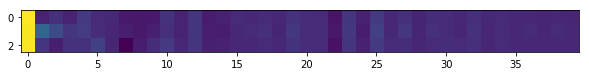

In [20]:
plt.figure(figsize=(10, 10)); plt.imshow(DATA[0])

Text(0.5, 0, 'z')

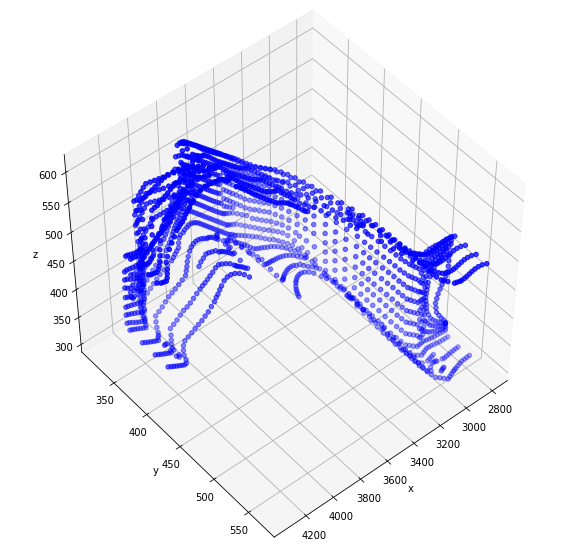

In [21]:
db1 = h5py.File(name1 + data[0], 'r')
ds1 = db1['shape_xyz']
ds1 = np.asarray(ds1).astype(np.float32)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ds1[0], ds1[1], ds1[2], c='b', marker='o')
ax.view_init(50, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

(3, 1714)


Text(0.5, 0, 'z')

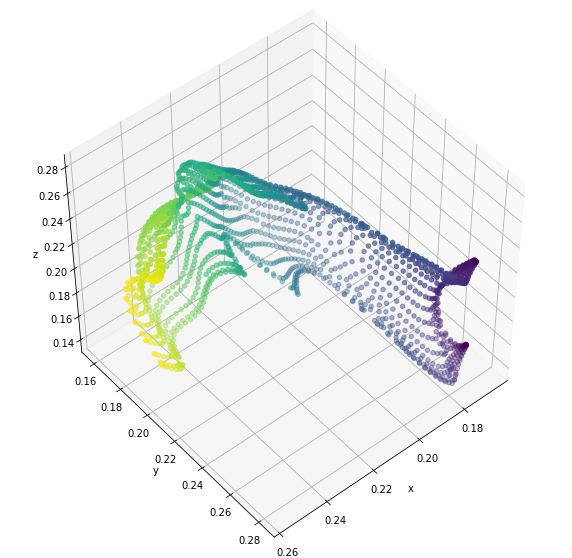

In [22]:
xyz = np.dot(DATA[0], np.linalg.pinv(ds))
print (xyz.shape)
cl = np.linalg.norm(np.abs(xyz - ds1), axis=0)
cl = (cl-np.amin(cl))/(np.amax(cl)-np.amin(cl))
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz[0], xyz[1], xyz[2], c=cl, marker='o')
ax.view_init(50, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

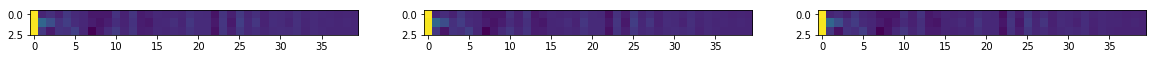

In [52]:
plt.figure(figsize=(20, 60)); 
plt.subplot(1,3,1); plt.imshow(DATA[dim-1])
plt.subplot(1,3,2); plt.imshow(DATA[dim])
plt.subplot(1,3,3); plt.imshow(DATA[dim+1])

------------------------------part embedding------------------------------

In [53]:
dim2 = 100
vae = LSTM_Var_Autoencoder(intermediate_dim = 500, z_dim = 3, n_dim=d, stateful = True) #default stateful = False

vae.fit(DATA[0:dim2*st], learning_rate=0.001, batch_size = 100, num_epochs = 500, opt = tf.train.AdamOptimizer, REG_LAMBDA = 0.01, grad_clip_norm=10, optimizer_params=None, verbose = True)



Training...


Epoch   1    Loss 0.00783
Epoch   11   Loss 0.00066
Epoch   21   Loss 0.00003
Epoch   31   Loss 0.00001
Epoch   41   Loss 0.00001
Epoch   51   Loss 0.00001
Epoch   61   Loss 0.00001
Epoch   71   Loss 0.00001
Epoch   81   Loss 0.00001
Epoch   91   Loss 0.00001
Epoch  101   Loss 0.00001
Epoch  111   Loss 0.00001
Epoch  121   Loss 0.00001
Epoch  131   Loss 0.00001
Epoch  141   Loss 0.00001
Epoch  151   Loss 0.00001
Epoch  161   Loss 0.00001
Epoch  171   Loss 0.00001
Epoch  181   Loss 0.00001
Epoch  191   Loss 0.00001
Epoch  201   Loss 0.00001
Epoch  211   Loss 0.00000
Epoch  221   Loss 0.00001
Epoch  231   Loss 0.00000
Epoch  241   Loss 0.00000
Epoch  251   Loss 0.00000
Epoch  261   Loss 0.00000
Epoch  271   Loss 0.00000
Epoch  281   Loss 0.00001
Epoch  291   Loss 0.00001
Epoch  301   Loss 0.00001
Epoch  311   Loss 0.00000
Epoch  321   Loss 0.00000
Epoch  331   Loss 0.00000
Epoch  341   Loss 0.00000
Epoch  351   Loss 0.00000
Epoch  361   Loss 0.00000
Epoch  371   Loss 0.00

In [54]:
x_reconstructed, recons_error = vae.reconstruct(DATA[dim2*st:], get_error = True) #returns squared error

x_reduced = vae.reduce(DATA) #latent space representation

Text(0.5, 0, 'latent 3')

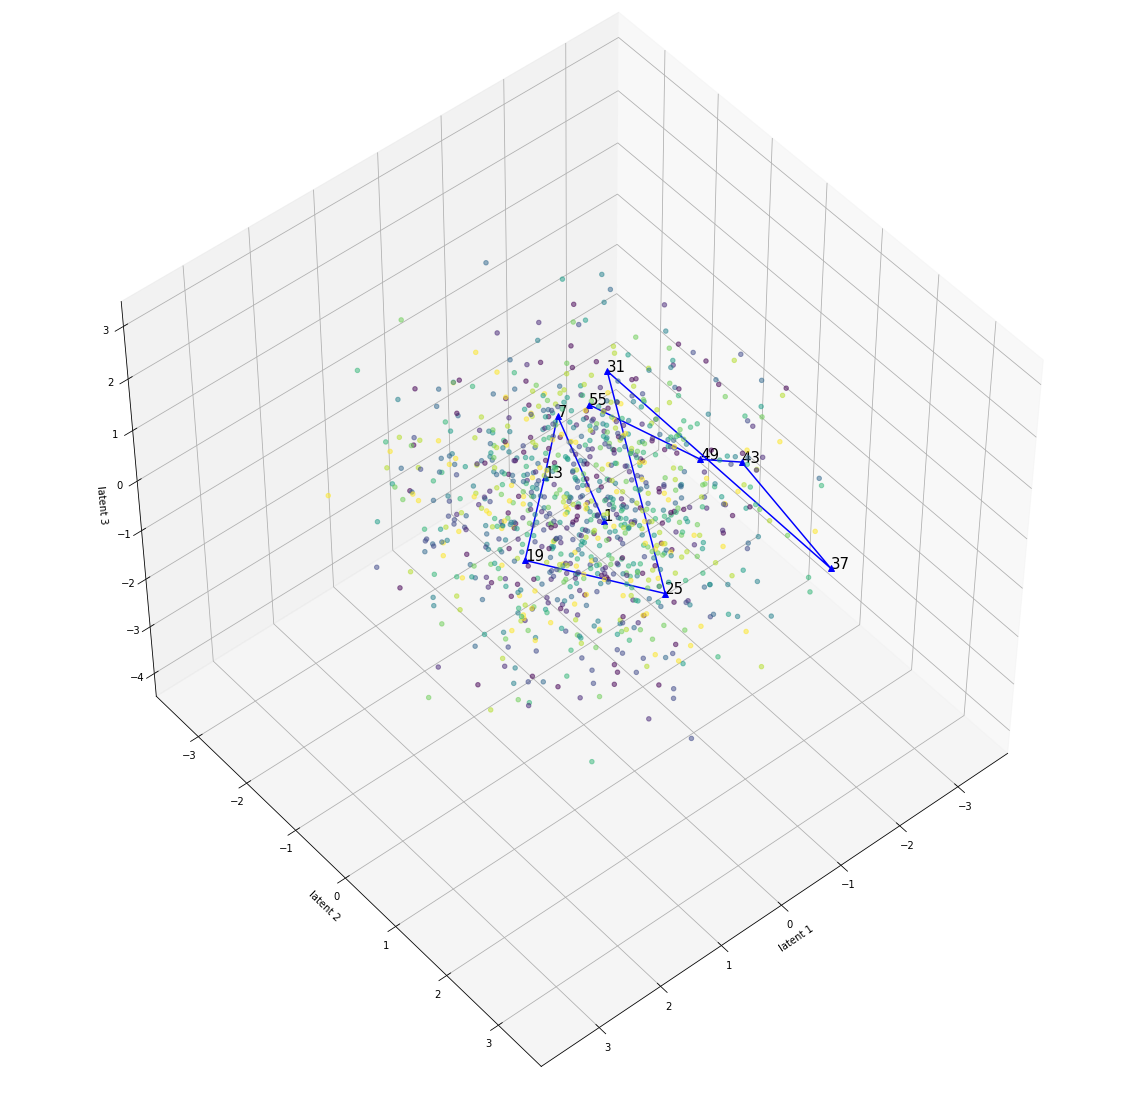

In [55]:
fig = plt.figure(figsize=(20, 20))
c = ['r', 'b']
m = ['o', '^']
label = []
for i in range(0, st):
    label.append(np.str(i*stride+1))
cl = np.zeros((dim2*st))    
for i in range(dim2):
    for j in range(st):
        cl[i*st + j] = j*(255.0/st)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_reduced[0:dim2*st, 0], x_reduced[0:dim2*st, 1], x_reduced[0:dim2*st, 2], c=cl, marker=m[0], alpha=0.5)
ax.plot(x_reduced[dim2*st:(dim2+1)*st, 0], x_reduced[dim2*st:(dim2+1)*st, 1], x_reduced[dim2*st:(dim2+1)*st, 2], c=c[1], marker=m[1])
ii = 0
for i in range(dim2*st, (dim2+1)*st):
    ax.text(x_reduced[i, 0], x_reduced[i, 1], x_reduced[i, 2], label[ii], size=15, zorder=1, color='k') 
    ii += 1
ax.view_init(50, 50)
ax.set_xlabel('latent 1')
ax.set_ylabel('latent 2')
ax.set_zlabel('latent 3')

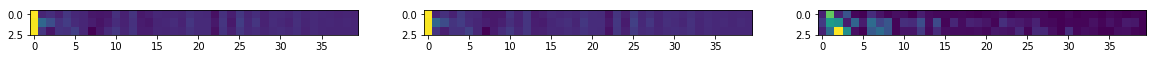

In [56]:
plt.figure(figsize=(20, 60)); 
plt.subplot(1,3,1); plt.imshow(x_reconstructed[0])
plt.subplot(1,3,2); plt.imshow(DATA[dim2*st])
plt.subplot(1,3,3); plt.imshow(np.abs(x_reconstructed[0] - DATA[dim2*st]))

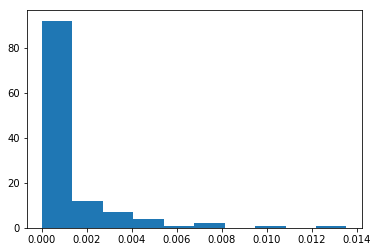

In [57]:
_,_,_ = plt.hist(np.abs(x_reconstructed[0] - DATA[dim2*st]).reshape((3*d)), bins=10)

(3, 1714)
(3, 1714)


Text(0.5, 0, 'z')

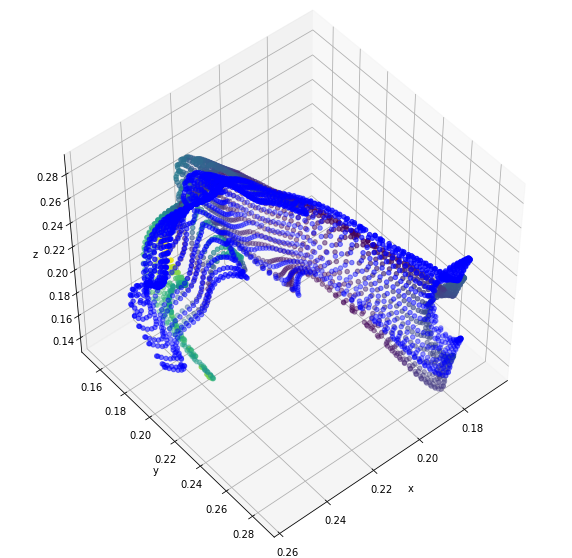

In [58]:
xyz = np.dot(DATA[dim2*st], np.linalg.pinv(ds))
xyz_reconstructed = np.dot(x_reconstructed[0], np.linalg.pinv(ds))
cl = np.linalg.norm(np.abs(xyz - xyz_reconstructed), axis=0)
cl = (cl-np.amin(cl))/(np.amax(cl)-np.amin(cl))
print (xyz_reconstructed.shape)
print (xyz.shape)
fig = plt.figure(figsize=(10, 10))
c = ['b', 'r']
m = ['o', 'o']
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz[0], xyz[1], xyz[2], c=c[0], marker=m[0])
ax.scatter(xyz_reconstructed[0], xyz_reconstructed[1], xyz_reconstructed[2], c=cl, marker=m[1])
ax.view_init(50, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [37]:
DATA3 = []
for i in range(dim):
    D = np.asarray(DATA[i*st:(i+1)*st]).reshape(st*3, d)
    DATA3.append(D)
print (len(DATA3), DATA3[0].shape)  
ddd = st*3
print (ddd, d)
dim3 = 100

205 (30, 40)
30 40


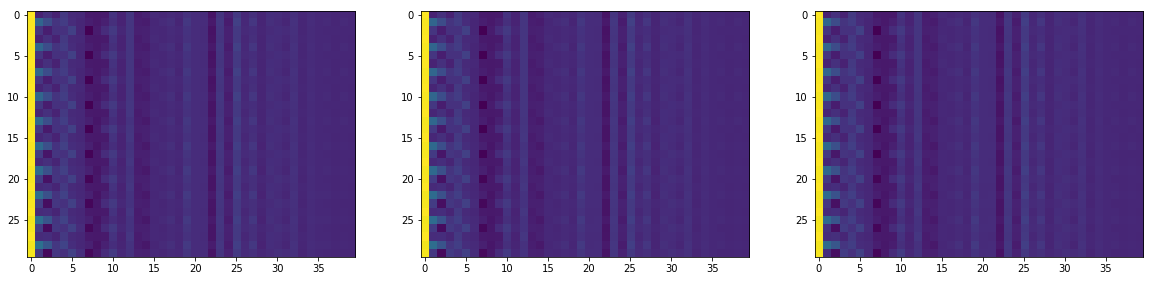

In [38]:
plt.figure(figsize=(20, 60)); 
plt.subplot(1,3,1); plt.imshow(DATA3[dim3-1])
plt.subplot(1,3,2); plt.imshow(DATA3[dim3])
plt.subplot(1,3,3); plt.imshow(DATA3[dim3+1])

------------------------------sequence embedding------------------------------

In [46]:
vae3 = LSTM_Var_Autoencoder(intermediate_dim = 1000, z_dim = 3, n_dim=d, stateful = True) #default stateful = False

vae3.fit(DATA3[0:dim3], learning_rate=0.001, batch_size = 10, num_epochs = 500, opt = tf.train.AdamOptimizer, REG_LAMBDA = 0.01, grad_clip_norm=10, optimizer_params=None, verbose = True)



Training...


Epoch   1    Loss 0.00888
Epoch   11   Loss 0.00053
Epoch   21   Loss 0.00040
Epoch   31   Loss 0.00034
Epoch   41   Loss 0.00029
Epoch   51   Loss 0.00026
Epoch   61   Loss 0.00024
Epoch   71   Loss 0.00022
Epoch   81   Loss 0.00021
Epoch   91   Loss 0.00020
Epoch  101   Loss 0.00020
Epoch  111   Loss 0.00018
Epoch  121   Loss 0.00008
Epoch  131   Loss 0.00000
Epoch  141   Loss 0.00000
Epoch  151   Loss 0.00000
Epoch  161   Loss 0.00000
Epoch  171   Loss 0.00000
Epoch  181   Loss 0.00000
Epoch  191   Loss 0.00000
Epoch  201   Loss 0.00000
Epoch  211   Loss 0.00000
Epoch  221   Loss 0.00000
Epoch  231   Loss 0.00000
Epoch  241   Loss 0.00000
Epoch  251   Loss 0.00000
Epoch  261   Loss 0.00000
Epoch  271   Loss 0.00000
Epoch  281   Loss 0.00000
Epoch  291   Loss 0.00000
Epoch  301   Loss 0.00000
Epoch  311   Loss 0.00000
Epoch  321   Loss 0.00000
Epoch  331   Loss 0.00000
Epoch  341   Loss 0.00000
Epoch  351   Loss 0.00000
Epoch  361   Loss 0.00000
Epoch  371   Loss 0.00

In [47]:
x_reconstructed3, recons_error3 = vae3.reconstruct(DATA3[dim3:], get_error = True) #returns squared error

x_reduced3 = vae3.reduce(DATA3) #latent space representation

Text(0.5, 0, 'latent 3')

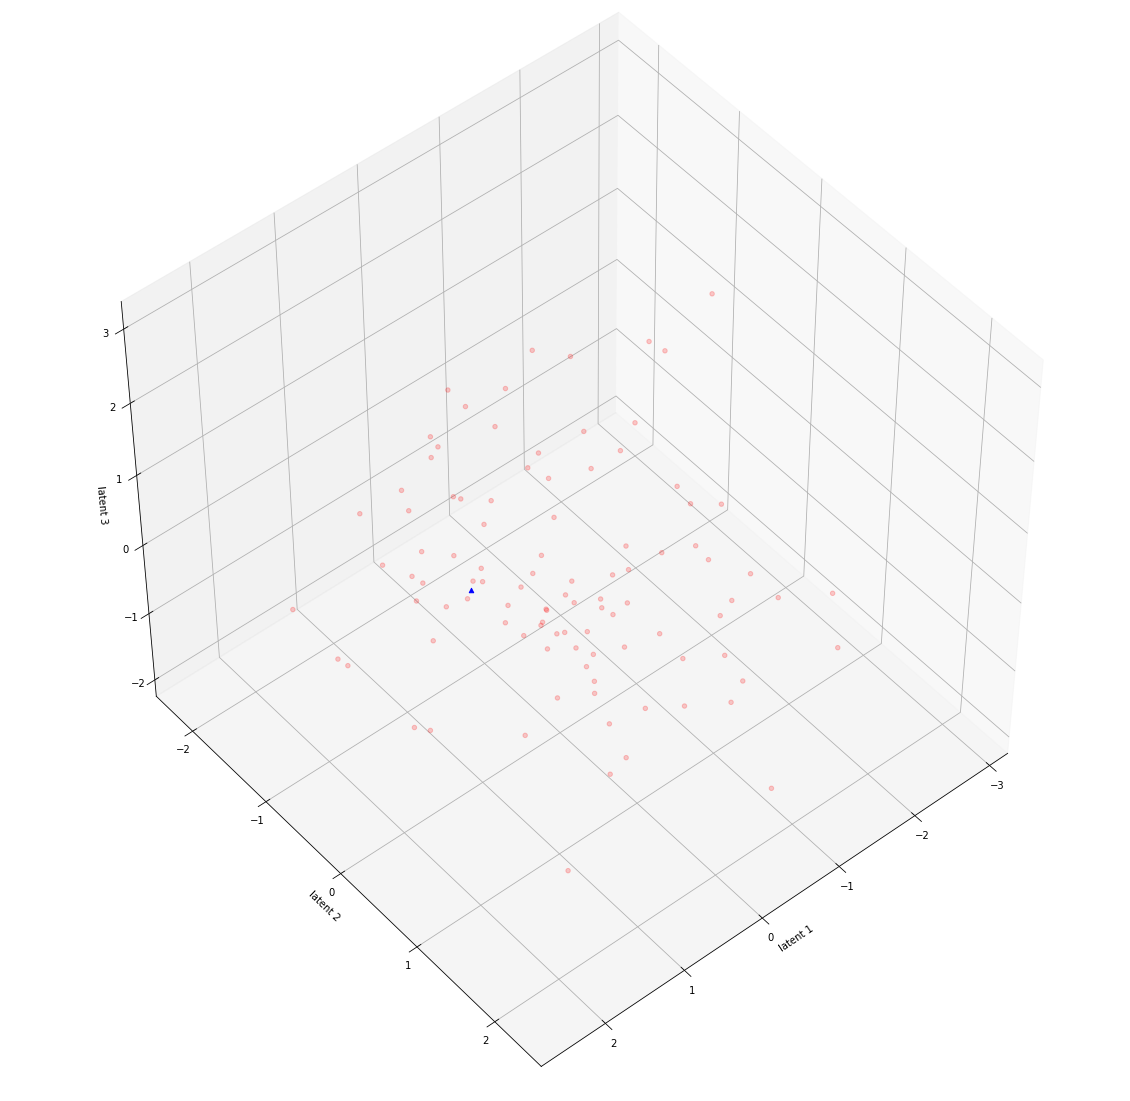

In [48]:
fig = plt.figure(figsize=(20, 20))
c = ['r', 'b']
m = ['o', '^']

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_reduced3[0:dim3, 0], x_reduced3[0:dim3, 1], x_reduced3[0:dim3, 2], c=c[0], marker=m[0], alpha=0.2)
ax.scatter(x_reduced3[dim3:dim3+1, 0], x_reduced3[dim3:dim3+1, 1], x_reduced3[dim3:dim3+1, 2], c=c[1], marker=m[1])

ax.view_init(50, 50)
ax.set_xlabel('latent 1')
ax.set_ylabel('latent 2')
ax.set_zlabel('latent 3')

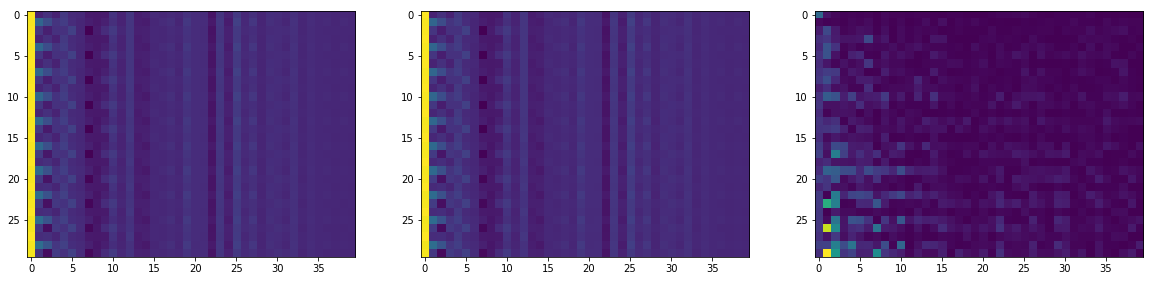

In [49]:
plt.figure(figsize=(20, 60)); 
plt.subplot(1,3,1); plt.imshow(x_reconstructed3[0])
plt.subplot(1,3,2); plt.imshow(DATA3[dim3])
plt.subplot(1,3,3); plt.imshow(np.abs(x_reconstructed3[0] - DATA3[dim3]))

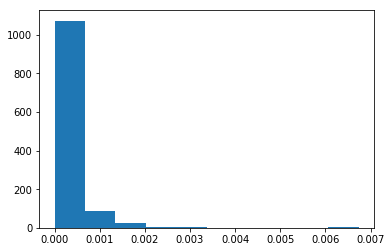

In [50]:
_,_,_ = plt.hist(np.abs(x_reconstructed3[0] - DATA3[dim3]).reshape((d*ddd)), bins=10)

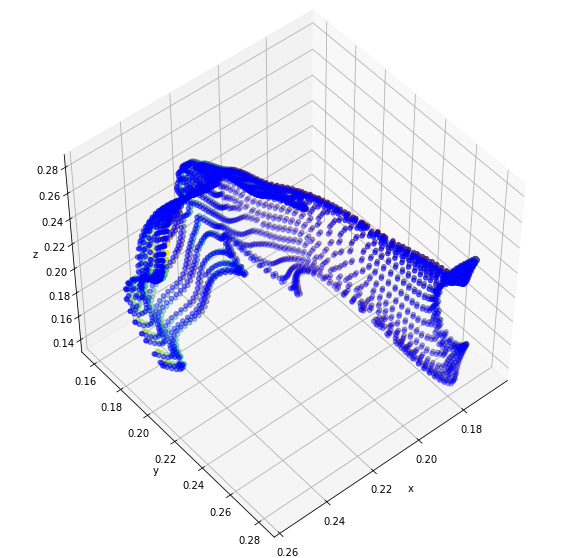

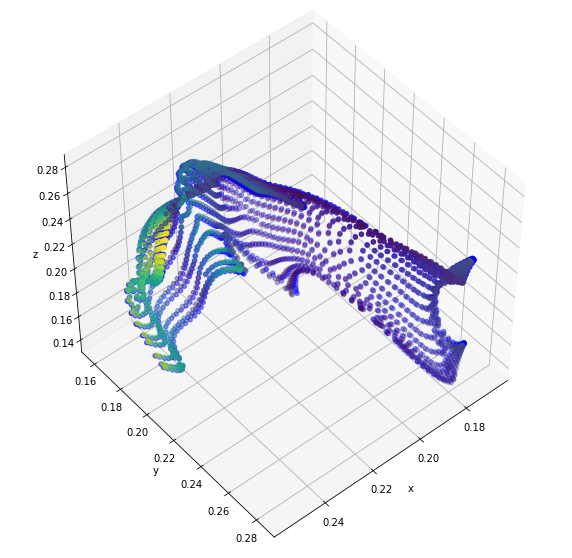

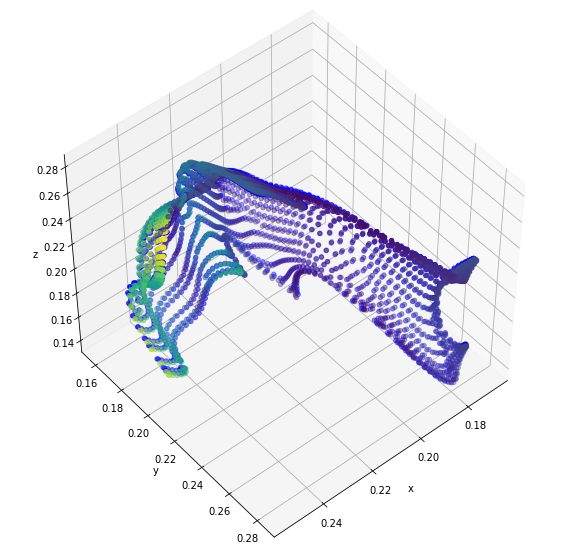

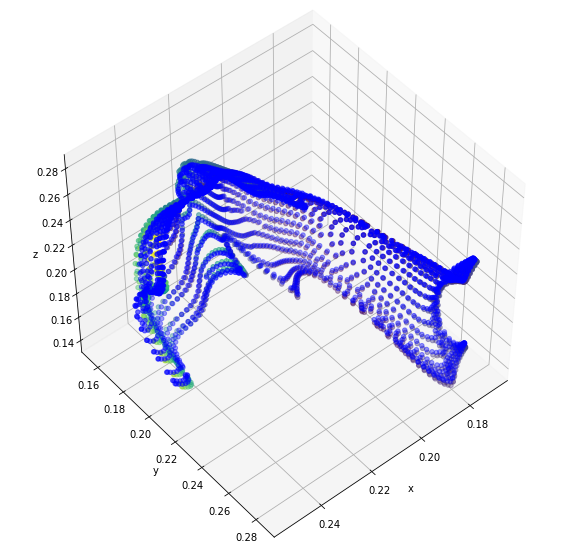

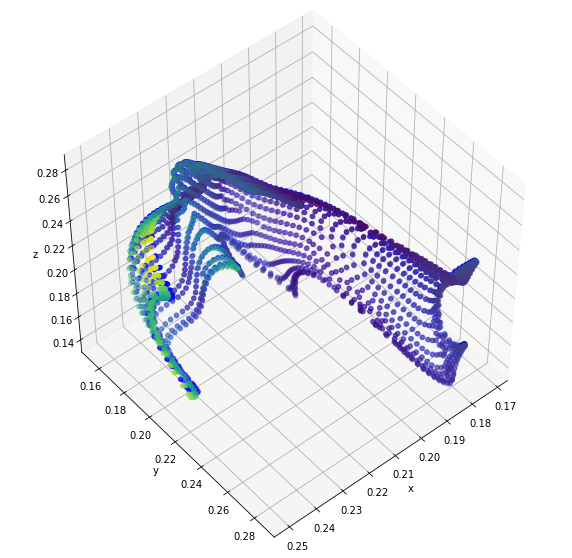

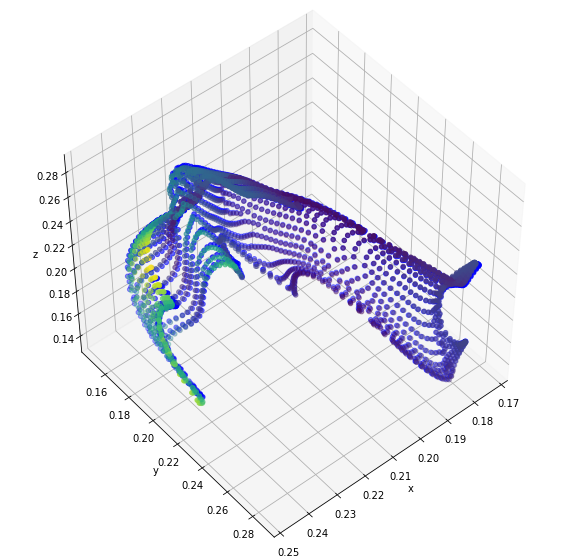

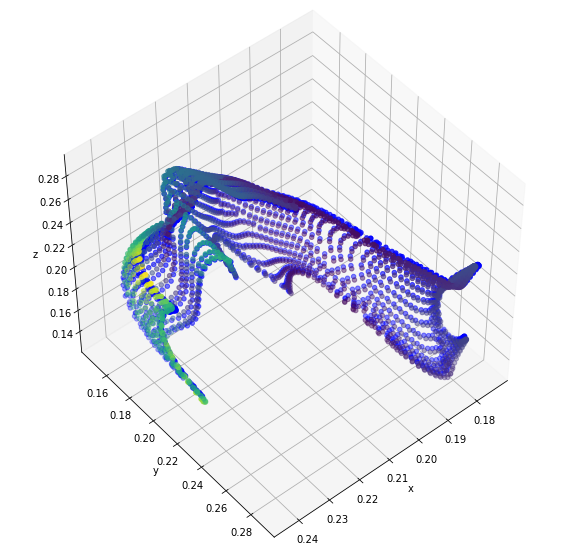

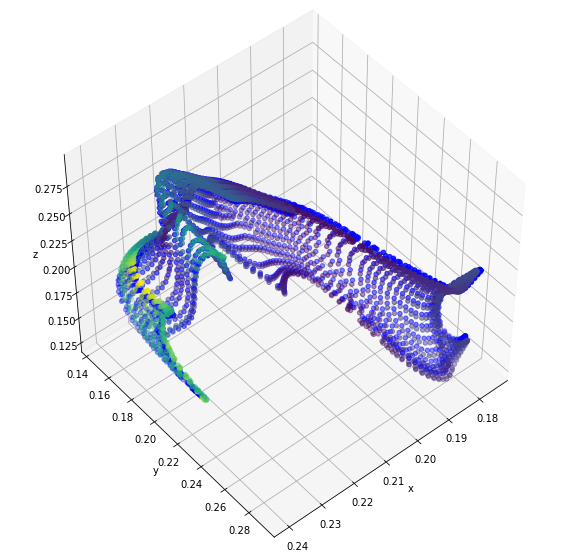

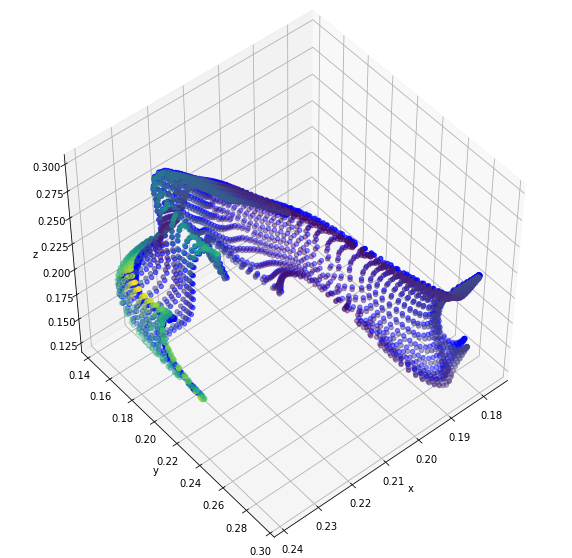

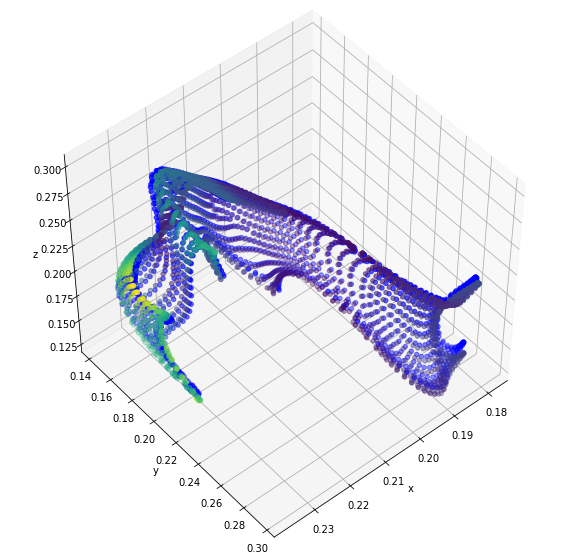

In [51]:
for i in range(st):
    xyz3 = np.dot(DATA[dim3*st+i], np.linalg.pinv(ds))
    xyz_reconstructed3 = np.dot(x_reconstructed3[0, i*3:(i+1)*3], np.linalg.pinv(ds))
    cl = np.linalg.norm(np.abs(xyz - xyz_reconstructed), axis=0)
    cl = (cl-np.amin(cl))/(np.amax(cl)-np.amin(cl))
    fig = plt.figure(figsize=(10, 10))
    c = ['b', 'r']
    m = ['o', 'o']
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xyz_reconstructed3[0], xyz_reconstructed3[1], xyz_reconstructed3[2], c=cl, marker=m[1])
    ax.scatter(xyz3[0], xyz3[1], xyz3[2], c=c[0], marker=m[0])
    ax.view_init(50, 50)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z') 